In [1]:
#import dependencies 

import csv
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn
from scipy.stats import linregress

In [2]:
#pull data from csvs 

fao_data_csv = "Resources/aquastatt.csv"
who_data_csv = "Resources/choleraa.csv"

fao_data=pd.read_csv(fao_data_csv)
chol_data = pd.read_csv(who_data_csv)

#test FAO data
fao_data.head()

,Area,Area Id,Variable Name,Variable Id,Year,Value,Symbol,Md
0,Myanmar,28.0,Dependency ratio,4192.0,1992.0,14.13,I,NaN
1,Myanmar,28.0,Dependency ratio,4192.0,1997.0,14.13,I,NaN
2,Myanmar,28.0,Dependency ratio,4192.0,2002.0,14.13,I,NaN
3,Myanmar,28.0,Dependency ratio,4192.0,2007.0,14.13,I,NaN
4,Myanmar,28.0,Dependency ratio,4192.0,2012.0,14.13,I,NaN


In [3]:
#check columns 
#what??
fao_data.columns

Index(['Area', 'Area Id', 'Variable Name', 'Variable Id', 'Year', 'Value',
       'Symbol', 'Md'],
      dtype='object')

In [4]:
#data came in with column data offset from "real" column names. Filter out "right data" with wrong column headers

fao_cleanup = fao_data[["Area", "Variable Name", "Year", "Value"]]

fao_cleanup.head()

,Area,Variable Name,Year,Value
0,Myanmar,Dependency ratio,1992.0,14.13
1,Myanmar,Dependency ratio,1997.0,14.13
2,Myanmar,Dependency ratio,2002.0,14.13
3,Myanmar,Dependency ratio,2007.0,14.13
4,Myanmar,Dependency ratio,2012.0,14.13


In [5]:
#Testing file_2
count2 = len(chol_data["COUNTRY (DISPLAY)"].value_counts())
# print(chol_data["COUNTRY (DISPLAY)"])
#creating a new dataframe with selected columns
clean_data = chol_data[["COUNTRY (DISPLAY)","YEAR (DISPLAY)","Display Value"]]

clean_df = pd.DataFrame(clean_data)

clean_df.head()


,COUNTRY (DISPLAY),YEAR (DISPLAY),Display Value
0,Afghanistan,1960,887
1,Bangladesh,1960,15618
2,India,1960,14621
3,Indonesia,1960,41
4,Myanmar,1960,259


In [6]:
#use .loc to filter out just rows with country names at head (take out rows at end that don't have data)

fao_targets = fao_cleanup.loc[fao_cleanup["Area"].isin(["Myanmar","Niger", "Nigeria", "Thailand"])]

fao_targets.index.name = "Index"

                              
fao_final = fao_targets.rename(columns={"Area":"Country"})

#convert year data to integers 

fao_final["Year"] = fao_final["Year"].astype(int)
fao_final


# # for country in fao_final:
#     if fao_final["Value"] == "NaN":
#         fao_final["Value"] = 0
        
# fao_indexed
fao_final.head()

,Country,Variable Name,Year,Value
Index,,,,
0,Myanmar,Dependency ratio,1992,14.13
1,Myanmar,Dependency ratio,1997,14.13
2,Myanmar,Dependency ratio,2002,14.13
3,Myanmar,Dependency ratio,2007,14.13
4,Myanmar,Dependency ratio,2012,14.13


In [7]:
# #selecting data for specific data
# #clean_d = clean_df.loc[clean_df["COUNTRY (DISPLAY)"] == "Nigeria", :]
who_final = clean_df.loc[clean_df["COUNTRY (DISPLAY)"].isin(["Nigeria","Niger","Myanmar", "Thailand"])]
who_final = who_final.rename(columns = {"COUNTRY (DISPLAY)": "Country", "YEAR (DISPLAY)": "Year", "Display Value": "Cholera Cases"})


# clean.head()
who_final.head()

,Country,Year,Cholera Cases
4,Myanmar,1960,259
13,Myanmar,1965,207
17,Thailand,1965,65
64,Myanmar,1993,1758
68,Nigeria,1993,4160


In [8]:
who_final = who_final.rename(columns = {"YEAR (DISPLAY)": "Year", "COUNTRY (DISPLAY)": "Country"})

who_final.head()

,Country,Year,Cholera Cases
4,Myanmar,1960,259
13,Myanmar,1965,207
17,Thailand,1965,65
64,Myanmar,1993,1758
68,Nigeria,1993,4160


In [9]:
#merge dataframes to join countries and years and sift out years for which there are no water safety data

total_data = pd.merge(who_final, fao_final, on=["Year", "Country"],how ="right")

total_data =total_data.sort_values("Year")

# total_data
# total_data["Variable Name"].unique()

In [10]:
total_data= total_data.fillna(0)
# total_data.head()
total_data.head()

,Country,Year,Cholera Cases,Variable Name,Value
53,Thailand,1990,0.0,Treated municipal wastewater,0.00
1,Myanmar,1992,826.0,Dependency ratio,14.13
2,Myanmar,1992,826.0,Total population with access to safe drinking-...,58.60
3,Nigeria,1992,8687.0,Dependency ratio,22.78
4,Nigeria,1992,8687.0,Total population with access to safe drinking-...,42.40


In [11]:
#for nigeria 
nigeria_data = total_data.loc[total_data["Country"].isin(["Nigeria"])]

nigeria_data

,Country,Year,Cholera Cases,Variable Name,Value
3,Nigeria,1992,8687.0,Dependency ratio,22.78
4,Nigeria,1992,8687.0,Total population with access to safe drinking-...,42.40
14,Nigeria,1997,1322.0,Total population with access to safe drinking-...,48.30
13,Nigeria,1997,1322.0,Dependency ratio,22.78
18,Nigeria,2002,5429.0,Total population with access to safe drinking-...,54.20
17,Nigeria,2002,5429.0,Dependency ratio,22.78
9,Nigeria,2007,1661.0,Dependency ratio,22.78
10,Nigeria,2007,1661.0,Total population with access to safe drinking-...,60.10
23,Nigeria,2012,597.0,Dependency ratio,22.78
24,Nigeria,2012,597.0,Total population with access to safe drinking-...,65.50


In [12]:
#For Nigeria - we only have two variables to work with from the FAO data. Creating .locs to sort out the other two below. 

#loc to filter out dependency data (line)
nigeria_dependency = nigeria_data.loc[nigeria_data["Variable Name"].isin(["Dependency ratio"])]
# nigeria_data = total_data.loc[total_data["Country"].isin(["Nigeria"])]
nigeria_access = nigeria_data.loc[nigeria_data["Variable Name"].isin(["Total population with access to safe drinking-water (JMP)"])]


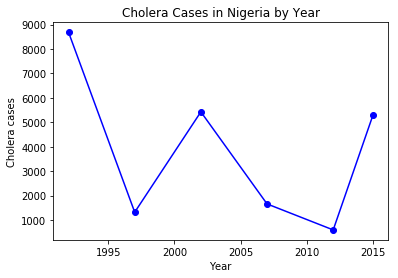

In [13]:
#plot cholera vs. years
x_axis = nigeria_access["Year"]
y_axis1 = nigeria_access["Cholera Cases"]
# y_axis2 = nigeria_dependency

plt.plot(x_axis, y_axis1, marker ='o', color='blue')

# Add labels 
plt.title("Cholera Cases in Nigeria by Year")
plt.xlabel("Year")
plt.ylabel("Cholera cases")

plt.show()


In [14]:
#For Niger 

niger_data = total_data.loc[total_data["Country"].isin(["Niger"])]

#loc to filter out dependency data (line)
niger_dependency = niger_data.loc[niger_data["Variable Name"].isin(["Dependency ratio"])]

niger_access = niger_data.loc[niger_data["Variable Name"].isin(["Total population with access to safe drinking-water (JMP)"])]


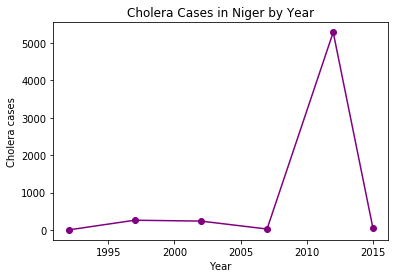

In [15]:
#plot cholera vs. years
x_axis = niger_access["Year"]
y_axis1 = niger_access["Cholera Cases"]
# y_axis2 = nigeria_dependency

plt.plot(x_axis, y_axis1, marker ='o', color='purple')

# Add labels 
plt.title("Cholera Cases in Niger by Year")
plt.xlabel("Year")
plt.ylabel("Cholera cases")

plt.show()


In [16]:
#For Myanmar 

myanmar_data = total_data.loc[total_data["Country"].isin(["Myanmar"])]

#loc to filter out dependency data (line)
myanmar_dependency = myanmar_data.loc[myanmar_data["Variable Name"].isin(["Dependency ratio"])]

myanmar_access = myanmar_data.loc[myanmar_data["Variable Name"].isin(["Total population with access to safe drinking-water (JMP)"])]


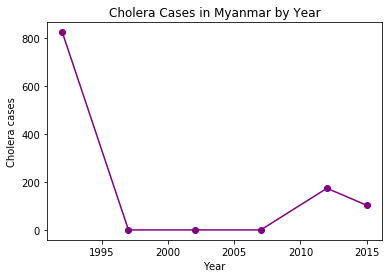

In [17]:
#plot cholera vs. years
x_axis = myanmar_access["Year"]
y_axis1 = myanmar_access["Cholera Cases"]
# y_axis2 = nigeria_dependency

plt.plot(x_axis, y_axis1, marker ='o', color='purple')

# Add labels 
plt.title("Cholera Cases in Myanmar by Year")
plt.xlabel("Year")
plt.ylabel("Cholera cases")

plt.show()


In [18]:
#For Thailand 

thailand_data = total_data.loc[total_data["Country"].isin(["Thailand"])]

#loc to filter out dependency data (line)
thailand_dependency = thailand_data.loc[thailand_data["Variable Name"].isin(["Dependency ratio"])]

thailand_access = thailand_data.loc[thailand_data["Variable Name"].isin(["Total population with access to safe drinking-water (JMP)"])]


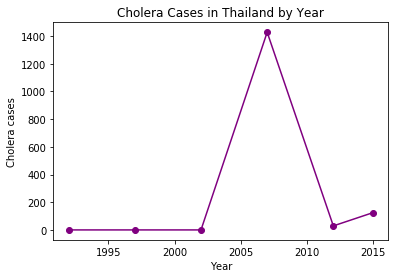

In [19]:
#plot cholera vs. years
x_axis = thailand_access["Year"]
y_axis1 = thailand_access["Cholera Cases"]
# y_axis2 = nigeria_dependency

plt.plot(x_axis, y_axis1, marker ='o', color='purple')

# Add labels 
plt.title("Cholera Cases in Thailand by Year")
plt.xlabel("Year")
plt.ylabel("Cholera cases")

plt.show()


In [20]:
the_csv = "Resources/Cholreg.csv"
csv_one_sigma = "Resources/Cholregonesigma.csv"
miss4 = "Resources/chol_missing_4.csv"
myan = "Resources/myanmar.csv"
thai = "Resources/thailand.csv"
nige = "Resources/niger.csv"
nigeria = "Resources/nigeria.csv"

cholera_data = pd.read_csv(the_csv)
cholera_sig = pd.read_csv(csv_one_sigma)

missing = pd.read_csv(miss4)
myanm = pd.read_csv(myan)
thail = pd.read_csv(thai)
ni = pd.read_csv(nige)
nie = pd.read_csv(nigeria)

In [21]:
cholera_data.head()

,Country,Population,Reported Cholera Cases,"Cholera Cases Per 100,000 People",Dependency Ratio (%)
0,Afghanistan,31056997,677,2.18,28.7200
1,Angola,12127071,78,0.64,0.2695
2,Australia,20264082,1,0.00,0.0000
3,Benin,7862944,761,9.68,60.9700
4,Burundi,8090068,434,5.36,19.7500


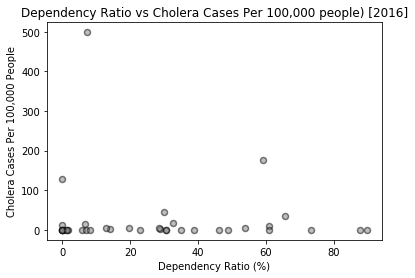

In [22]:
plt.scatter(cholera_data["Dependency Ratio (%)"], cholera_data["Cholera Cases Per 100,000 People"], color = "grey", edgecolors="black", label = "Cholera", alpha = 0.5, linewidth = 1.5)

plt.title("Dependency Ratio vs Cholera Cases Per 100,000 people) [2016]")
plt.xlabel("Dependency Ratio (%)")
plt.ylabel("Cholera Cases Per 100,000 People")

plt.savefig('Figures/Figure_1.png')

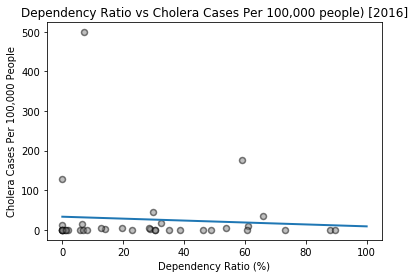

In [23]:
plt.scatter(cholera_data["Dependency Ratio (%)"], cholera_data["Cholera Cases Per 100,000 People"], color = "grey", edgecolors="black", label = "Cholera", alpha = 0.5, linewidth = 1.5)

plt.title("Dependency Ratio vs Cholera Cases Per 100,000 people) [2016]")
plt.xlabel("Dependency Ratio (%)")
plt.ylabel("Cholera Cases Per 100,000 People")

t = np.arange(0.0, 120.0, 20)
s = -0.2434*t +  33.301
line, = plt.plot(t, s, lw=2)

plt.savefig('Figures/Figure_2.png')

In [24]:
cholera_sig.head()

,Country,Population,Reported Cholera Cases,"Cholera Cases Per 100,000 People",Dependency Ratio (%)
0,Afghanistan,31056997,677,2.18,28.7200
1,Angola,12127071,78,0.64,0.2695
2,Australia,20264082,1,0.00,0.0000
3,Benin,7862944,761,9.68,60.9700
4,Burundi,8090068,434,5.36,19.7500


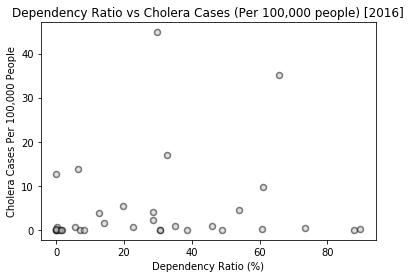

In [25]:
plt.scatter(cholera_sig["Dependency Ratio (%)"], cholera_sig["Cholera Cases Per 100,000 People"], color = "silver", edgecolors="black", label = "Cholera", alpha = 0.5, linewidth = 1.5)

plt.title("Dependency Ratio vs Cholera Cases (Per 100,000 people) [2016]")
plt.xlabel("Dependency Ratio (%)")
plt.ylabel("Cholera Cases Per 100,000 People")

plt.savefig('Figures/Figure_3.png')

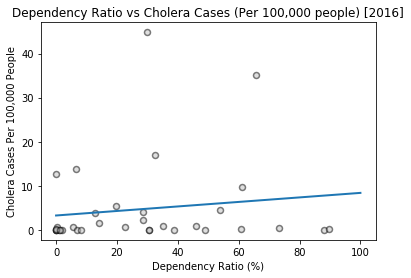

In [26]:
plt.scatter(cholera_sig["Dependency Ratio (%)"], cholera_sig["Cholera Cases Per 100,000 People"], color = "silver", edgecolors="black", label = "Cholera", alpha = 0.5, linewidth = 1.5)

plt.title("Dependency Ratio vs Cholera Cases (Per 100,000 people) [2016]")
plt.xlabel("Dependency Ratio (%)")
plt.ylabel("Cholera Cases Per 100,000 People")

t = np.arange(0.0, 120.0, 20)
s = 0.0513*t +  3.2596
line, = plt.plot(t, s, lw=2)

plt.savefig('Figures/Figure_4.png')

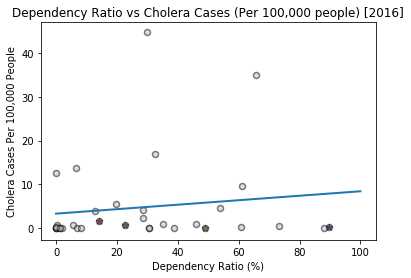

In [27]:
plt.scatter(cholera_sig["Dependency Ratio (%)"], cholera_sig["Cholera Cases Per 100,000 People"], color = "silver", edgecolors="black", label = "Cholera", alpha = 0.5, linewidth = 1.5)
plt.scatter(myanm["Dependency Ratio (%)"], myanm["Cholera Cases Per 100,000 People"], color = "red", marker = "*", edgecolors="black", label = "Cholera", alpha = 0.5, linewidth = 1.5)
plt.scatter(thail["Dependency Ratio (%)"], thail["Cholera Cases Per 100,000 People"], color = "darkorange", marker = "*", edgecolors="black", label = "Cholera", alpha = 0.5, linewidth = 1.5)
plt.scatter(ni["Dependency Ratio (%)"], ni["Cholera Cases Per 100,000 People"], color = "blue", marker = "*", edgecolors="black", label = "Cholera", alpha = 0.5, linewidth = 1.5)
plt.scatter(nie["Dependency Ratio (%)"], nie["Cholera Cases Per 100,000 People"], color = "forestgreen", marker = "*", edgecolors="black", label = "Cholera", alpha = 0.5, linewidth = 1.5)


plt.title("Dependency Ratio vs Cholera Cases (Per 100,000 people) [2016]")
plt.xlabel("Dependency Ratio (%)")
plt.ylabel("Cholera Cases Per 100,000 People")

t = np.arange(0.0, 120.0, 20)
s = 0.0513*t +  3.2596
line, = plt.plot(t, s, lw=2)

plt.savefig('Figures/Figure_5')